## **Setting up the Necessities**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
batch_size = 8

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.0 MB/s eta 0:00:00


In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Sports Activity Recognizer

/content/drive/My Drive/Sports Activity Recognizer


## **Download the images from the Browser**

I am using DuckDuckGo Image Search

In [ ]:
doc(search_images_ddg)

In [ ]:
labels = [
    "golf swing",
    "basketball shot",
    "soccer kick",
    "baseball swing",
    "cricket batting",
    "volleyball spike",
    "rugby tackle",
    "boxing jab",
    "ice hockey slapshot",
    "cycling sprint",
    "archery",
    "skiing parallel",
    "surfing cutback",
    "rowing",
    "horse riding gallop"
]
len(labels)

15

In [ ]:
images = search_images_ddg(labels[0], max_images=350)
print(len(images))
print(f'URL of one image {images[0]}')

350
URL of one image https://i.ytimg.com/vi/3ObpHKPzKd4/maxresdefault.jpg


In [ ]:
doc(download_url)

In [ ]:
dest = 'golf swing.jpg'
download_url(images[0],dest,show_progress=False)

Path('golf swing.jpg')

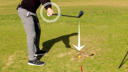

In [ ]:
image=Image.open(dest)
image.to_thumb(128,128)

## **Combibing all images in data folder**

In [ ]:
data_path='data'
if not os.path.exists(data_path):
  os.mkdir(data_path)

for type in labels:
  dest=f'{data_path}/{type}'
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    urls = search_images_ddg(type,max_images=350)
    download_images(dest,urls=urls)

  except:
    continue

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
download_image_counts=get_image_files(data_path)
download_image_counts

(#4793) [Path('data/golf swing/9312a815-73f0-4405-a89f-f9f3f30eb1c1.png'),Path('data/golf swing/87e4de2a-6540-4346-8b57-eaec24f75727.png'),Path('data/golf swing/2fce5eb6-98a6-4084-9883-595c05c143ef.jpg'),Path('data/golf swing/0ab0c20c-6a83-4801-a107-2bac20089411.jpg'),Path('data/golf swing/d30220f8-c4ef-41fc-8408-612dece1b228.jpg'),Path('data/golf swing/7b31faa5-848c-4cfc-acc7-ca0e0267f7d2.jpg'),Path('data/golf swing/0c9cca97-3c30-45d0-9d5c-3de685b3372c.jpg'),Path('data/golf swing/9e384999-3645-4cb7-802b-391fa2299bb8.jpg'),Path('data/golf swing/b7913ef8-2188-4d14-a766-ab07fbf99531.png'),Path('data/golf swing/c0cac3c1-c0c8-4064-92dc-07da50e71044.gif')...]

In [ ]:
failed_images=verify_images(download_image_counts)
failed_images

(#113) [Path('data/golf swing/bb705dd4-2a97-4c18-8fea-a692c7615e3d.png'),Path('data/golf swing/900dca9e-1ad2-45ad-9d64-06ae20f46d8e.jpg'),Path('data/golf swing/b0e43bbe-75b6-4fb2-819c-47e25e6443ad.png'),Path('data/golf swing/bce22826-0c69-49e4-9ba2-ee654f449254.jpg'),Path('data/golf swing/555e4fff-3d30-4421-919e-4f7cfe02a889.jpg'),Path('data/basketball shot/907766ad-fe8a-4c7b-9572-2a29c689e2f0.jpg'),Path('data/basketball shot/ebf2d51c-7353-44ab-8f1e-329fc1673f33.png'),Path('data/basketball shot/6d1b7f9c-3da0-48db-a6d6-8d7d1f107a61.jpg'),Path('data/basketball shot/70b187a8-7556-405b-aa53-82d09ef4cfbb.png'),Path('data/basketball shot/1d8a30e1-edb2-49ae-9a03-510cfc144ccb.jpg')...]

In [ ]:
failed_images.map(Path.unlink)

(#113) [None,None,None,None,None,None,None,None,None,None...]

## **Data to Data Loaders**

In [ ]:
dblock=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
dls=dblock.dataloaders(data_path,bs=batch_size)

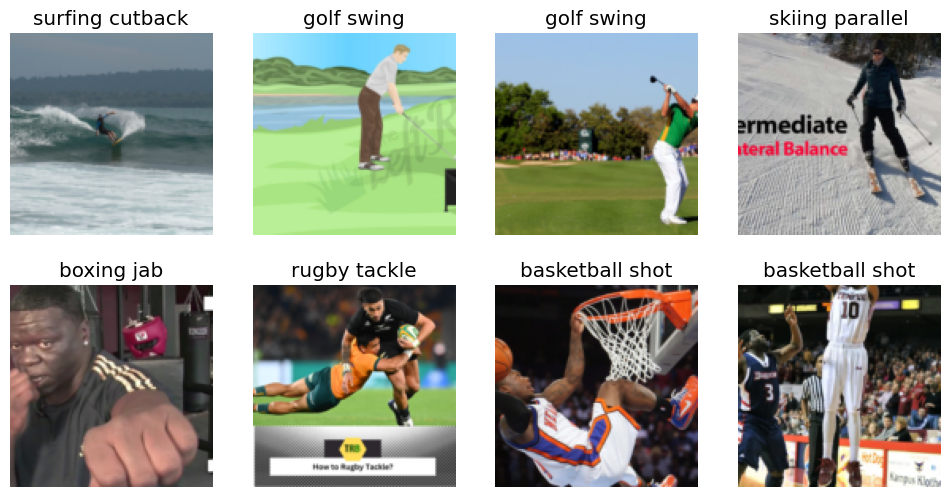

In [ ]:
dls.train.show_batch(max_n=8,nrows=2)

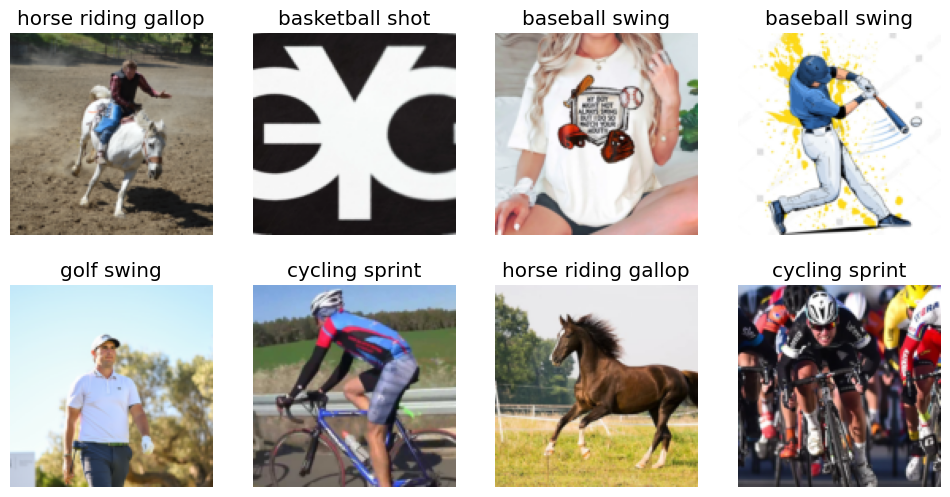

In [ ]:
dls.valid.show_batch(max_n=8,nrows=2)

## **Data Augmentation**

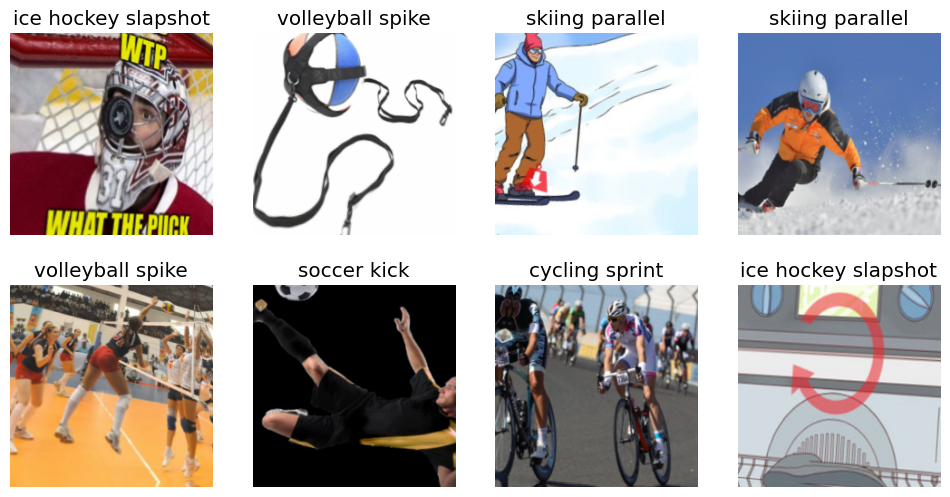

In [ ]:
dblock=dblock.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),batch_tfms=aug_transforms())
dls=dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8,nrows=2)

In [ ]:
torch.save(dls,'dataloader_version0.pkl')